<a href="https://colab.research.google.com/github/Daniel-ASG/Aulas_de_cursos/blob/main/GeoPandas_Parte_1_Trabalhando_com_dados_Geoespaciais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install geopandas

     |████████████████████████████████| 972kB 5.6MB/s 
     |████████████████████████████████| 6.5MB 12.0MB/s 
     |████████████████████████████████| 14.8MB 298kB/s 


# Entendendo o funcionamento do GeoPandas

In [4]:
import geopandas as gpd

## Fonte de dados

https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/UFs/

In [5]:
rj = gpd.read_file('/content/drive/MyDrive/Analise_de_dados/Mapas/33MUE250GC_SIR.shp')

In [6]:
type(rj)

geopandas.geodataframe.GeoDataFrame

In [7]:
rj

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1468,3300100,ANGRA DOS REIS,"MULTIPOLYGON (((-44.33208 -23.02384, -44.33221..."
1,1469,3300159,APERIBÉ,"POLYGON ((-42.08950 -21.62893, -42.08912 -21.6..."
2,1470,3300209,ARARUAMA,"POLYGON ((-42.22526 -22.59253, -42.22521 -22.5..."
3,1471,3300225,AREAL,"POLYGON ((-43.16007 -22.20005, -43.16003 -22.1..."
4,1472,3300233,ARMAÇÃO DOS BÚZIOS,"MULTIPOLYGON (((-41.98427 -22.74458, -41.98296..."
...,...,...,...,...
87,1555,3306008,TRÊS RIOS,"POLYGON ((-43.13666 -22.10933, -43.13182 -22.1..."
88,1556,3306107,VALENÇA,"POLYGON ((-43.82120 -22.08844, -43.82101 -22.0..."
89,1557,3306156,VARRE-SAI,"POLYGON ((-41.82695 -20.84164, -41.82686 -20.8..."
90,1558,3306206,VASSOURAS,"POLYGON ((-43.61208 -22.30841, -43.61113 -22.3..."


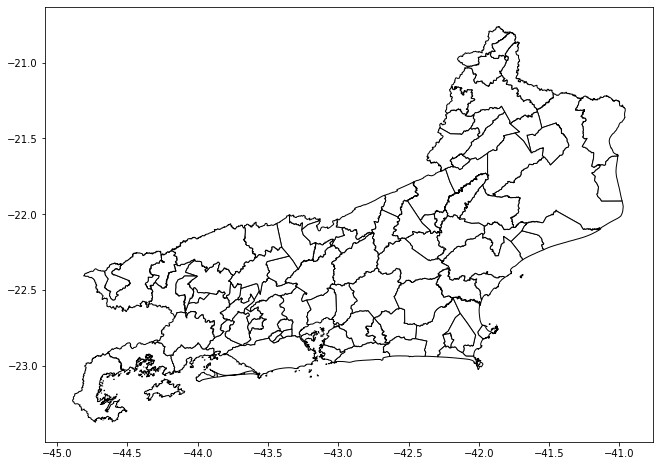

In [8]:
rj.plot(color='white', edgecolor='black', figsize=(15,8));

In [9]:
from shapely.geometry import Polygon, Point, LineString, MultiPolygon

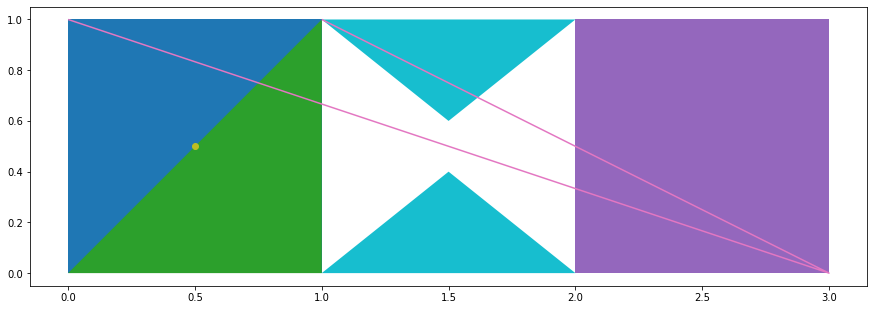

In [10]:
p1 = Polygon([(0,0), (1,0), (1,1), (0,1)])
p2 = Polygon([(0,0), (1,0), (1,1)])
p3 = Polygon([(2,0), (3,0), (3,1), (2,1)])
p4 = LineString([(0,1), (3,0), (1,1)])
p5 = Point(0.5, 0.5)
p6 = Polygon([(1,0), (1.5,0.4), (2,0)])
p7 = Polygon([(1,1), (1.5,0.6), (2,1)])
p8 = MultiPolygon([p6, p7])

g = gpd.GeoSeries([p1, p2, p3, p4, p5, p8])
g.plot(cmap='tab10', figsize=(15,8));

In [11]:
g

0    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
1    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
2    POLYGON ((2.00000 0.00000, 3.00000 0.00000, 3....
3    LINESTRING (0.00000 1.00000, 3.00000 0.00000, ...
4                              POINT (0.50000 0.50000)
5    MULTIPOLYGON (((1.00000 0.00000, 1.50000 0.400...
dtype: geometry

# Criando Shapefiles

In [12]:
rj = rj[rj['NM_MUNICIP'] == 'RIO DE JANEIRO']

In [13]:
rj

,ID,CD_GEOCODM,NM_MUNICIP,geometry
67,1535,3304557,RIO DE JANEIRO,"MULTIPOLYGON (((-43.12376 -22.80712, -43.12380..."


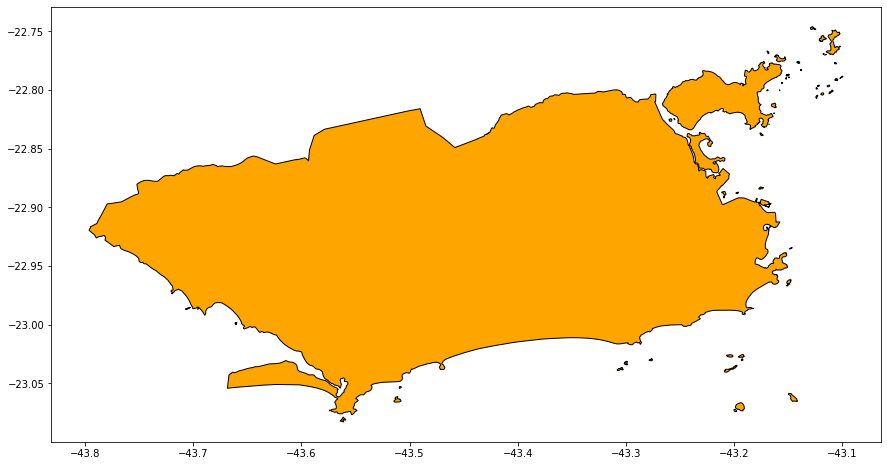

In [14]:
rj.plot(color='orange', edgecolor='black', figsize=(15,8));

## Salvando

In [15]:
import os

dir = '/content/drive/MyDrive/Analise_de_dados/Mapas/RJ-MUNIC'
if not os.path.exists(dir):
    os.makedirs(dir)

In [16]:
rj.to_file(dir + '/RJ-MUNIC.shp')

# Transformando DataFrame em GeoDataFrame

In [17]:
import pandas as pd

In [18]:
dados = pd.read_table('https://raw.githubusercontent.com/Daniel-ASG/Aulas_de_cursos/main/dados.txt')
dados.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000


In [19]:
from shapely.geometry import Point

In [22]:
x = zip(dados.Longitude, dados.Latitude)
x

In [23]:
list(x)

[(-43.4629464, -23.0164552),
 (-43.3369111, -22.9431995),
 (-43.300517, -22.873849),
 (-43.4127033, -22.9847874),
 (-51.92528, -14.235004),
 (-43.477504700000004, -23.0189271),
 (-43.247108700000005, -22.933574899999996),
 (-43.192534, -22.9823004),
 (-51.92528, -14.235004),
 (-43.175411, -22.9364023),
 (-43.262945, -22.918533),
 (-49.0606445, -26.922570899999997),
 (-43.303056, -23.013213),
 (-43.1698189, -22.952982000000002),
 (-43.1849587, -22.970644399999998),
 (-43.354812100000004, -23.0097423),
 (-49.0606445, -26.922570899999997),
 (-43.3461644, -22.938107000000002),
 (-43.181953799999995, -22.9497255),
 (-43.2327966, -22.9218818),
 (-43.3939698, -22.9995191),
 (-43.280851500000004, -22.9055097),
 (-43.1875152, -22.934498),
 (-43.5016663, -23.019108300000003),
 (-43.45904960000001, -23.023215),
 (-43.233903399999996, -22.9936095),
 (-43.1987716, -22.985367999999998),
 (-43.230810600000005, -22.9771863),
 (-43.2525968, -22.926766600000004),
 (-51.92528, -14.235004),
 (-43.18529320

In [24]:
geometry = [Point(x) for x in zip(dados.Longitude, dados.Latitude)]

In [25]:
crs = {'proj': 'latlong', 'ellps':'WGS84', 'datun':'WGS84', 'no_defs':True}
geo_dados = gpd.GeoDataFrame(dados, crs=crs, geometry=geometry)

In [26]:
geo_dados

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (-43.46295 -23.01646)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (-43.33691 -22.94320)
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (-43.30052 -22.87385)
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (-43.41270 -22.98479)
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000,POINT (-51.92528 -14.23500)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000,POINT (-43.55076 -22.87835)
4996,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000,POINT (-43.48729 -23.02472)
4997,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000,POINT (-43.20618 -22.95943)
4998,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000,POINT (-43.26049 -22.91877)


In [27]:
dir = '/content/drive/MyDrive/Analise_de_dados/Mapas/RJ-DATASET'
if not os.path.exists(dir):
    os.makedirs(dir)

In [29]:
geo_dados.to_file(dir + '/DATASET.shp')

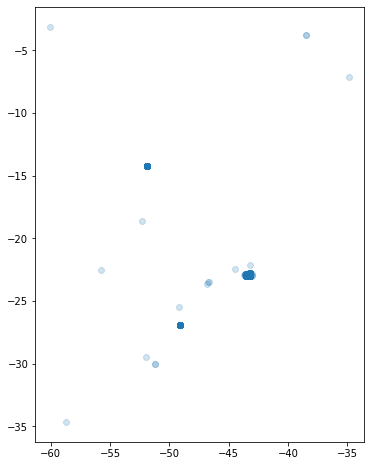

In [31]:
geo_dados.plot(figsize=(15,8), alpha=0.2)

# Modificando o sistema de coordenadas

## Fonte de dados

http://www.spatialreference.org/

https://www.lapig.iesa.ufg.br/lapig/cursos_online/gvsig/a_projeo_utm_no_brasil.html

![UTM_Brasil[1].png](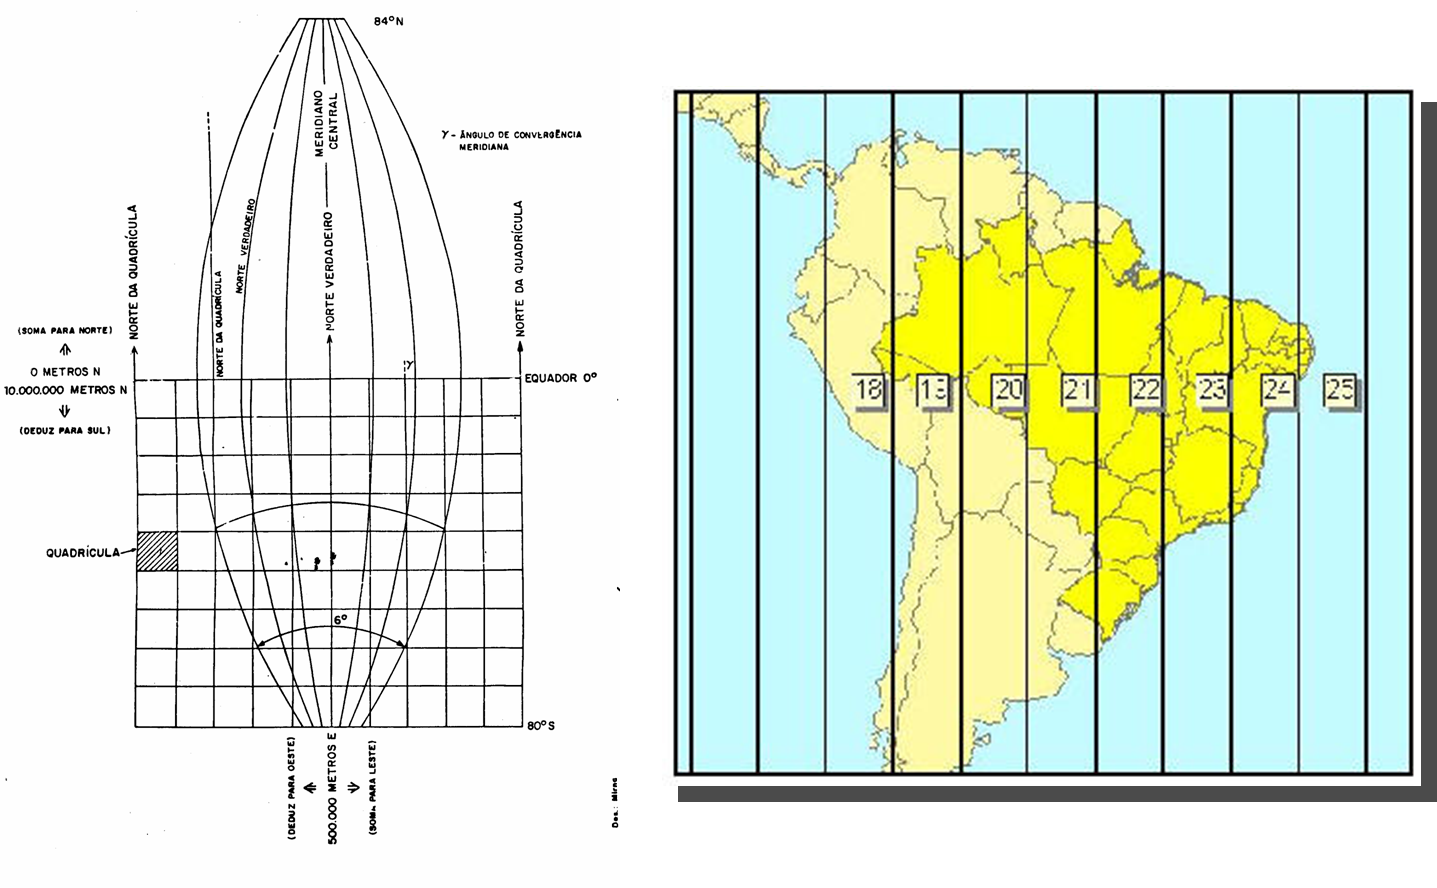)

In [32]:
rj.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: SIRGAS2000
- Ellipsoid: Geodetic_Reference_System_of_1980
- Prime Meridian: Greenwich

In [33]:
geo_dados.crs

<Geographic 2D CRS: +proj=latlong +ellps=WGS84 +datun=WGS84 +no_defs + ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: Unknown based on WGS84 ellipsoid
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [34]:
rj = rj.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [35]:
geo_dados = geo_dados.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [36]:
rj.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [37]:
geo_dados.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [38]:
rj.to_file('/content/drive/MyDrive/Analise_de_dados/Mapas/RJ-MUNIC/RJ-MUNIC.shp')
geo_dados.to_file('/content/drive/MyDrive/Analise_de_dados/Mapas/RJ-DATASET/DATASET.shp')

In [39]:
rj2 = gpd.read_file('/content/drive/MyDrive/Analise_de_dados/Mapas/RJ-MUNIC/RJ-MUNIC.shp')
rj2

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1535,3304557,RIO DE JANEIRO,"MULTIPOLYGON (((692.576 7476.609, 692.572 7476..."


In [40]:
rj2.crs

<Projected CRS: PROJCS["Transverse_Mercator",GEOGCS["GCS_unknown", ...>
Name: Transverse_Mercator
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

# Selecionando pontos dentro de uma região

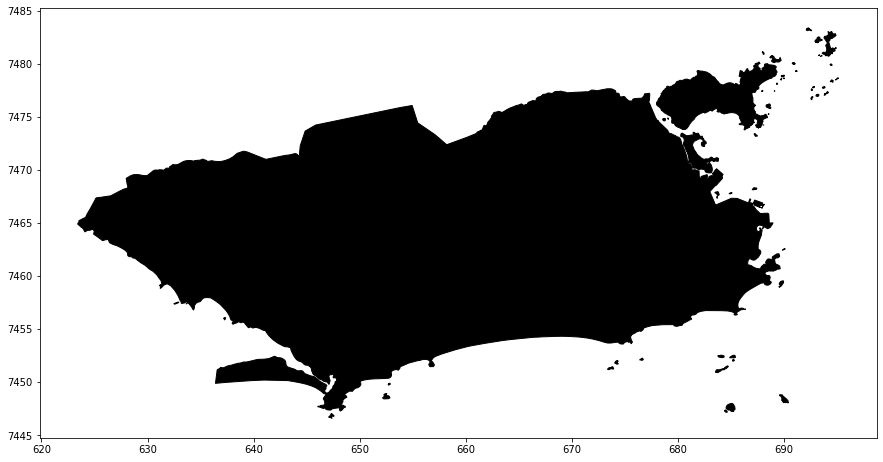

In [43]:
rj.plot(color='black', edgecolor='black', figsize=(15,8))

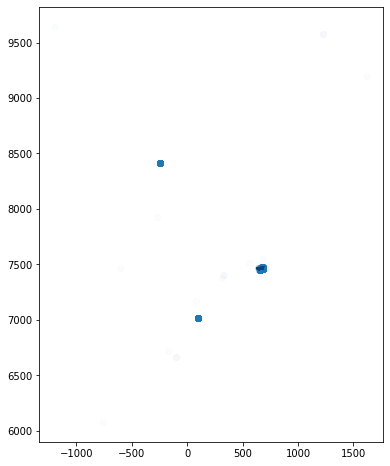

In [45]:
base = rj.plot(color='black', edgecolor='black', figsize=(15,8))
geo_dados.plot(ax=base, figsize=(15,8), alpha=0.02)

In [46]:
rj.iloc[0]

ID                                                         1535
CD_GEOCODM                                              3304557
NM_MUNICIP                                       RIO DE JANEIRO
geometry      (POLYGON ((692.5758012880638 7476.609203982483...
Name: 67, dtype: object

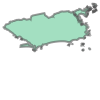

In [47]:
rj.iloc[0].geometry

In [48]:
geo_dados.iloc[0]

Area                                                 138
Bairro                          Recreio dos Bandeirantes
Cidade                                    Rio de Janeiro
Endereco                             Rua Vicente Scofano
Estado                                                RJ
Latitude                                        -23.0165
Longitude                                       -43.4629
Quartos                                                3
Suites                                                 1
Vagas                                                  3
Tipo                                         Apartamento
Transacao                                          Venda
Valor                                            1095000
geometry     POINT (657.5137068691058 7453.832425203198)
Name: 0, dtype: object

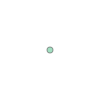

In [49]:
geo_dados.iloc[0].geometry

In [50]:
geo_dados.iloc[0].geometry.within(rj.iloc[0].geometry)

True

In [51]:
rj.iloc[0].geometry.contains(geo_dados.iloc[0].geometry)

True

In [52]:
geo_dados['geometry'].within(rj.iloc[0].geometry)

0        True
1        True
2        True
3        True
4       False
        ...  
4995     True
4996     True
4997     True
4998     True
4999     True
Length: 5000, dtype: bool

In [53]:
amostra = geo_dados.iloc[:12]
amostra

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.514 7453.832)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.524 7461.803)
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.345 7469.440)
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.701 7457.284)
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000,POINT (-248.715 8415.117)
5,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656.019 7453.574)
6,74,Tijuca,Rio de Janeiro,Rua Amoroso Costa,RJ,-22.933575,-43.247109,3,2,1,Apartamento,Venda,595000,POINT (679.746 7462.762)
7,200,Copacabana,Rio de Janeiro,Rua Souza Lima,RJ,-22.982300,-43.192534,4,1,1,Apartamento,Venda,2100000,POINT (685.278 7457.298)
8,119,Barra da Tijuca,Rio de Janeiro,Península Fit,RJ,-14.235004,-51.925280,3,2,2,Apartamento,Venda,1130000,POINT (-248.715 8415.117)
9,88,Flamengo,Rio de Janeiro,Rua Senador Vergueiro,RJ,-22.936402,-43.175411,2,2,1,Apartamento,Venda,1450000,POINT (687.096 7462.359)


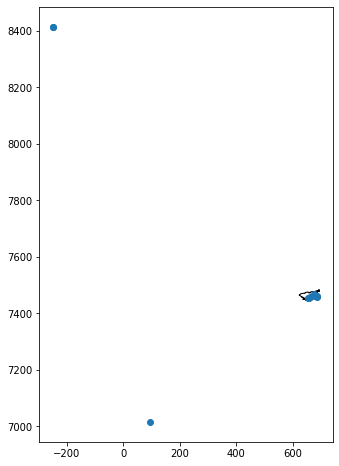

In [54]:
base = rj.plot(color='white', edgecolor='black', figsize=(15,8))
amostra.plot(ax=base, figsize=(15,8), alpha=1)

In [55]:
antes = geo_dados.shape[0]
antes

5000

In [56]:
geo_dados = geo_dados[geo_dados['geometry'].within(rj.iloc[0].geometry)]

In [57]:
depois = geo_dados.shape[0]
depois

4513

In [58]:
antes - depois

487

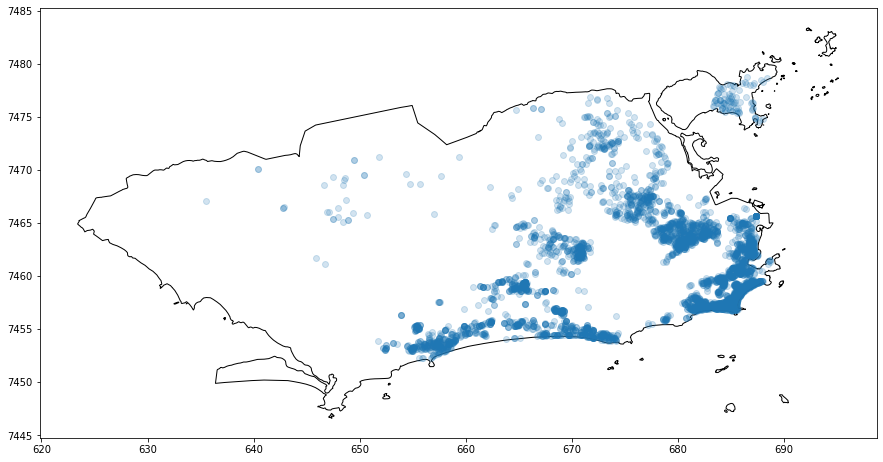

In [62]:
base = rj.plot(color='white', edgecolor='black', figsize=(15,8))
geo_dados.plot(ax=base, figsize=(15,8), alpha=0.2)

In [63]:
geo_dados.to_file('/content/drive/MyDrive/Analise_de_dados/Mapas/RJ-DATASET/DATASET.shp')

# Distâncias até a estação de metrô mais próxima

## Fonte de dados
* www.data.rio
* https://www.data.rio/datasets/esta%C3%A7%C3%B5es-metr%C3%B4
* https://opendata.arcgis.com/datasets/7a0b22723c5a458faaae79f046163504_19.geojson

In [64]:
metro = gpd.read_file('https://opendata.arcgis.com/datasets/7a0b22723c5a458faaae79f046163504_19.geojson')
metro.head()

,OBJECTID,Cod,Nome,Flg_ATM,Flg_Bicicletario,Flg_Elevador,Flg_Linha1,Flg_Linha2,Obs,Flg_Ativa,Status,Data_Inc,Flg_Linha4,Integra_Trem,Integra_Onibus,Integra_BRT,Corredor,Integra_VLT,Onibus,Flg_Metro_Superficie,Metro_Superficie,Data_Inauguracao,geometry
0,1,1,Pavuna,1,1.0,1.0,0,1,None,1,None,1970-01-01T00:00:00+00:00,0,1,0,0,None,0,None,0,None,1998,POINT (-43.36485 -22.80662)
1,2,2,Engenheiro Rubens Paiva,1,1.0,1.0,0,1,None,1,None,1970-01-01T00:00:00+00:00,0,0,0,0,None,0,None,0,None,1998,POINT (-43.35845 -22.81627)
2,3,3,Acari / Fazenda Botafogo,0,0.0,0.0,0,1,None,1,None,1970-01-01T00:00:00+00:00,0,0,0,0,None,0,None,0,None,1998,POINT (-43.34964 -22.82452)
3,4,4,Coelho Neto,1,0.0,0.0,0,1,None,1,None,1970-01-01T00:00:00+00:00,0,0,0,0,None,0,None,0,None,1998,POINT (-43.34326 -22.83148)
4,5,5,Colégio,1,1.0,0.0,0,1,None,1,None,1970-01-01T00:00:00+00:00,0,0,0,0,None,0,None,0,None,1998,POINT (-43.33386 -22.84269)


In [65]:
metro.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [66]:
metro = metro.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [67]:
metro.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [68]:
metro.head()

,OBJECTID,Cod,Nome,Flg_ATM,Flg_Bicicletario,Flg_Elevador,Flg_Linha1,Flg_Linha2,Obs,Flg_Ativa,Status,Data_Inc,Flg_Linha4,Integra_Trem,Integra_Onibus,Integra_BRT,Corredor,Integra_VLT,Onibus,Flg_Metro_Superficie,Metro_Superficie,Data_Inauguracao,geometry
0,1,1,Pavuna,1,1.0,1.0,0,1,None,1,None,1970-01-01T00:00:00+00:00,0,1,0,0,None,0,None,0,None,1998,POINT (667.827 7476.959)
1,2,2,Engenheiro Rubens Paiva,1,1.0,1.0,0,1,None,1,None,1970-01-01T00:00:00+00:00,0,0,0,0,None,0,None,0,None,1998,POINT (668.471 7475.883)
2,3,3,Acari / Fazenda Botafogo,0,0.0,0.0,0,1,None,1,None,1970-01-01T00:00:00+00:00,0,0,0,0,None,0,None,0,None,1998,POINT (669.365 7474.959)
3,4,4,Coelho Neto,1,0.0,0.0,0,1,None,1,None,1970-01-01T00:00:00+00:00,0,0,0,0,None,0,None,0,None,1998,POINT (670.012 7474.182)
4,5,5,Colégio,1,1.0,0.0,0,1,None,1,None,1970-01-01T00:00:00+00:00,0,0,0,0,None,0,None,0,None,1998,POINT (670.963 7472.930)
